# Visualization with plotnine

* from lesson [Making Plots With plotnine](https://adyork.github.io/python-oceanography-lesson/14-visualization-ggplot-python/index.html)

## Disclaimer

Python has powerful built-in plotting capabilities such as `matplotlib`, but for
this episode, we will be using the [`plotnine`][plotnine]
package, which facilitates the creation of highly-informative plots of
structured data based on the R implementation of [`ggplot2`][ggplot2]
and [The Grammar of Graphics][grammar-of-graphics]
by Leland Wilkinson. The `plotnine`
package is built on top of Matplotlib and interacts well with Pandas.

> ## Reminder
> `plotnine` is not included in the standard Anaconda installation and needs
> to be installed separately. If you haven't done so already, you can find installation
> instructions on the [Setup page][setup-plotnine].


Just as with the other packages, `plotnine` needs to be imported. It is good
practice to not just load an entire package such as `from plotnine import *`,
but to use an abbreviation as we used `pd` for Pandas:

In [14]:
%matplotlib inline
import plotnine as p9


From now on, the functions of `plotnine` are available using `p9.`. For the
exercise, we will use the `surveys.csv` data set, with the `NA` values removed

In [15]:
import pandas as pd

surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

In [16]:
surveys_complete.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0



## Plotting with plotnine

The `plotnine` package (cfr. other packages conform The Grammar of Graphics) supports the creation of complex plots from data in a
dataframe. It uses default settings, which help creating publication quality
plots with a minimal amount of settings and tweaking.

`plotnine` graphics are built step by step by adding new elements adding
different elements on top of each other using the `+` operator. Putting the
individual steps together in brackets `()` provides Python-compatible syntax.

To build a `plotnine` graphic we need to:

- Bind the plot to a specific data frame using the `data` argument:


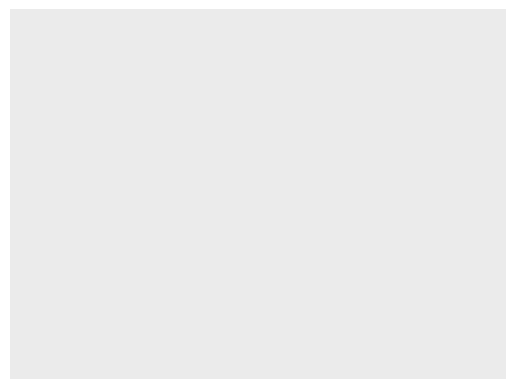

<ggplot: (-9223371961342658556)>

In [69]:
(p9.ggplot(data=surveys_complete))
#will show blank plot


As we have not defined anything else, just an empty figure is available and
presented.

- Define aesthetics (`aes`), by **selecting variables** used in the plot and
`mapping` them to a presentation such as plotting size, shape, color, etc. You
can interpret this as: **which** of the variables will influence the plotted
objects/geometries:


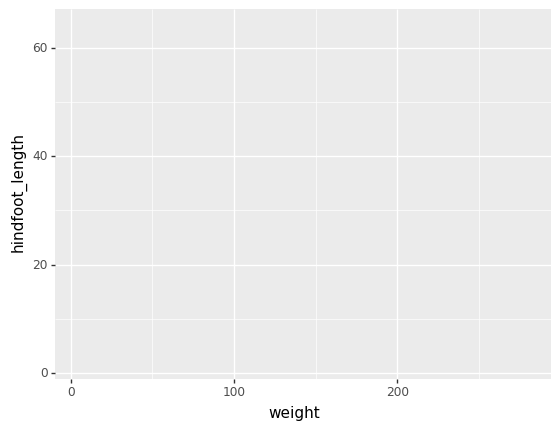

<ggplot: (-9223371961344226040)>

In [19]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length')))
#will show blank plot with axes labels 

The most important aes mappings are: `x`, `y`, `alpha`, `color`, `colour`,
`fill`, `linetype`, `shape`, `size` and `stroke`.

- Still no specific data is plotted, as we have to define what kind of geometry
will be used for the plot. The most straightforward is probably using points.
Points is one of the `geoms` options, the graphical representation of the data
in the plot. Others are lines, bars,... To add a geom to the plot use `+`
operator:


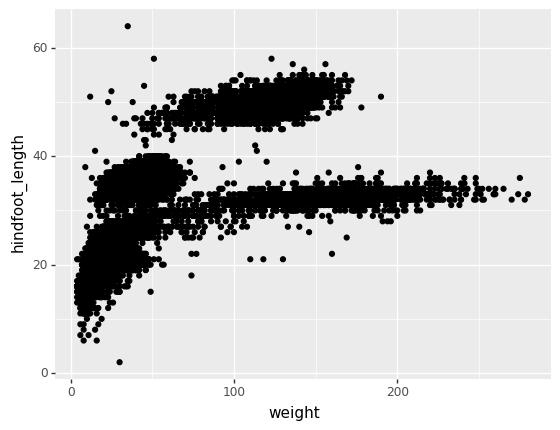

<ggplot: (-9223371961344199536)>

In [23]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)


The `+` in the `plotnine` package is particularly useful because it allows you
to modify existing `plotnine` objects. This means you can easily set up plot
*templates* and conveniently explore different types of plots, so the above
plot can also be generated with code like this:

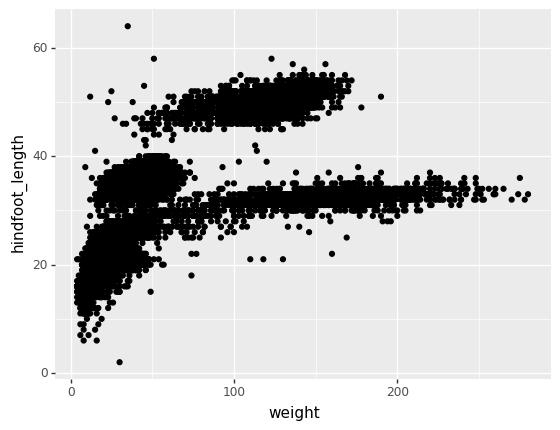

<ggplot: (-9223371961342891532)>

In [24]:
# Create
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))

# Draw the plot
surveys_plot + p9.geom_point()



> ## Challenge - bar chart
> Working on the `surveys_complete` data set, use the `plot-id` column to
> create a `bar`-plot that counts the number of records for each plot. (Check
> the documentation of the bar geometry to handle the counts)
>

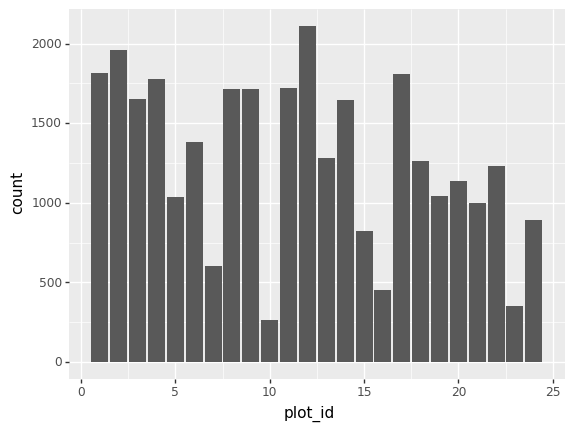

<ggplot: (-9223371961342957232)>

In [27]:
# a Challenge Answer
(p9.ggplot(data=surveys_complete,
            mapping=p9.aes(x='plot_id'))
     + p9.geom_bar()
)


Notes:

- Anything you put in the `ggplot()` function can be seen by any geom layers
that you add (i.e., these are universal plot settings). This includes the `x`
and `y` axis you set up in `aes()`.
- You can also specify aesthetics for a given `geom` independently of the
aesthetics defined globally in the `ggplot()` function.

## Building your plots iteratively

Building plots with `plotnine` is typically an iterative process. We start by
defining the dataset we'll use, lay the axes, and choose a geom. Hence, the
`data`, `aes` and `geom-*` are the elementary elements of any graph:

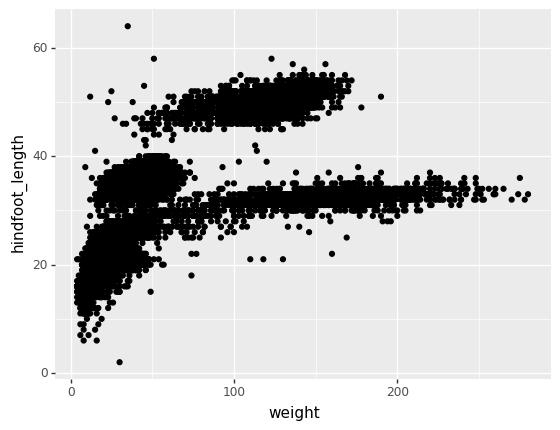

<ggplot: (-9223371961343048516)>

In [29]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)


Then, we start modifying this plot to extract more information from it. For
instance, we can add transparency (alpha) to avoid overplotting:

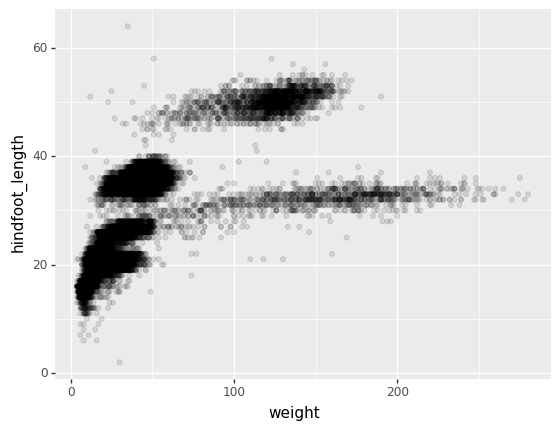

<ggplot: (-9223371961343048696)>

In [30]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1)
)



We can also add colors for all the points



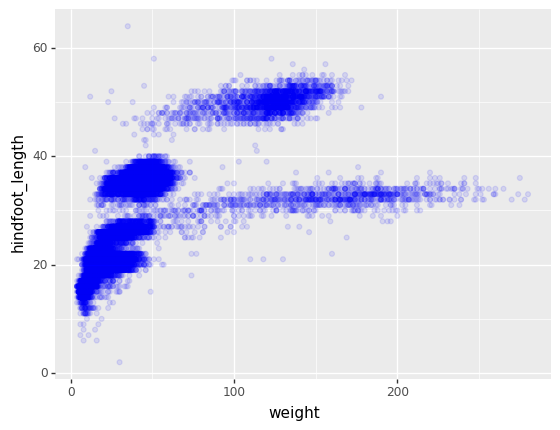

<ggplot: (-9223371961340930908)>

In [31]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.1, color='blue')
)

Or to color each species in the plot differently, map the `species_id` column
to the color aesthetic:

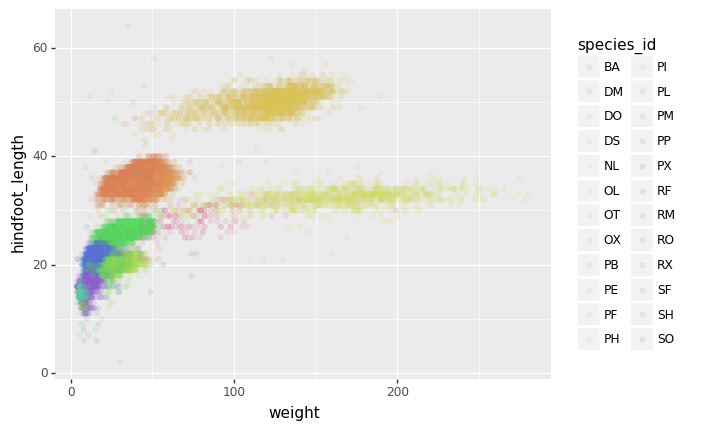

<ggplot: (-9223371961344199532)>

In [33]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)


Apart from the adaptations of the arguments and settings of the `data`, `aes`
and `geom-*` elements, additional elements can be added as well, using the `+`
operator:

- Changing the labels:

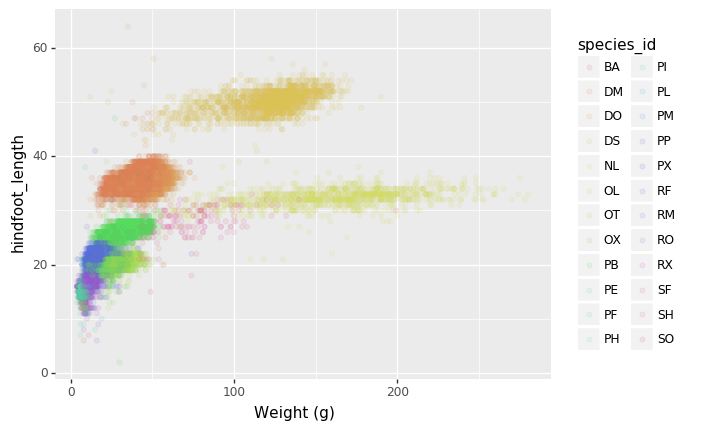

<ggplot: (-9223371961344905080)>

In [34]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
)


- Defining scale for colors, axes,... For example, a log-version of the x-axis
could support the interpretation of the lower numbers:

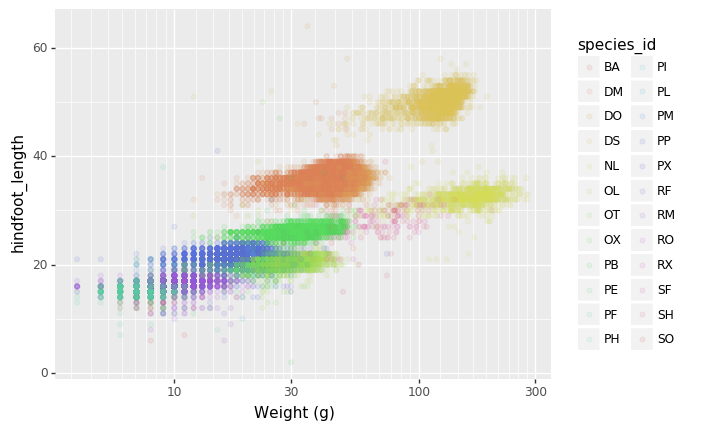

<ggplot: (-9223371961344898396)>

In [35]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
)


- Changing the theme (`theme_*`) or some specific theming (`theme`) elements.
Usually plots with white background look more readable when printed.  We can
set the background to white using the function `theme_bw()`.

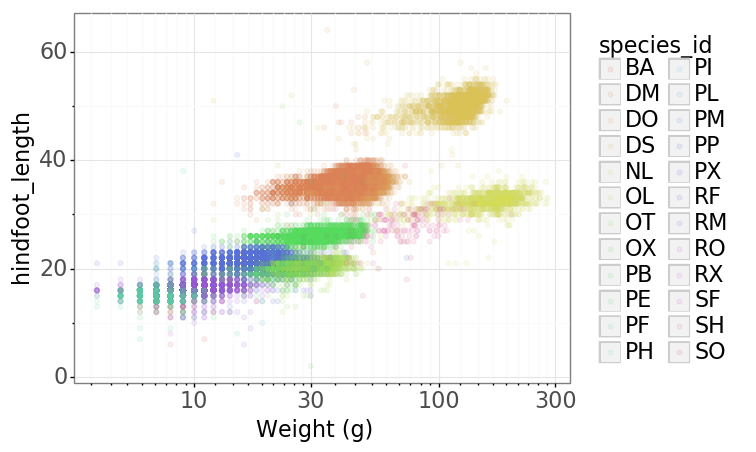

<ggplot: (-9223371961344978184)>

In [36]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
)


> ## Challenge - Bar plot adaptations
> Adapt the bar plot of the previous exercise by mapping the `sex` variable to
> the color fill of the bar chart. Change the `scale` of the color fill by
> providing the colors `blue` and `orange` manually
> (see [API reference][plotnine-api] to find the appropriate function).

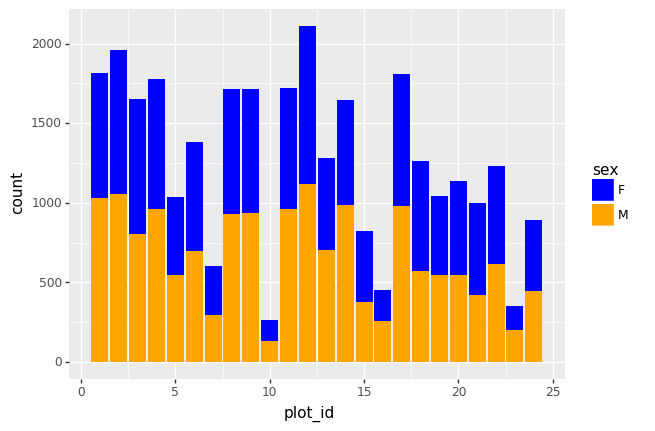

<ggplot: (-9223371961343027384)>

In [39]:
#A challenge answer:
(p9.ggplot(data=surveys_complete,
            mapping=p9.aes(x='plot_id',
                           fill='sex'))
     + p9.geom_bar()
     + p9.scale_fill_manual(["blue", "orange"])
)



## Plotting distributions

Visualizing distributions is a common task during data exploration and
analysis. To visualize the distribution of `weight` within each `species_id`
group, a boxplot can be used:


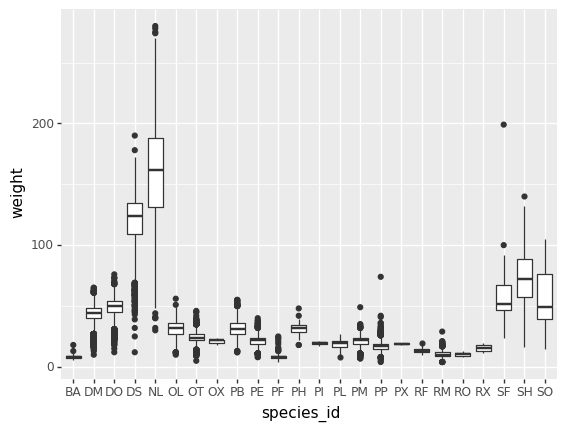

<ggplot: (-9223371961344221780)>

In [41]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
)


By adding points of the individual observations to the boxplot, we can have a
better idea of the number of measurements and of their distribution:

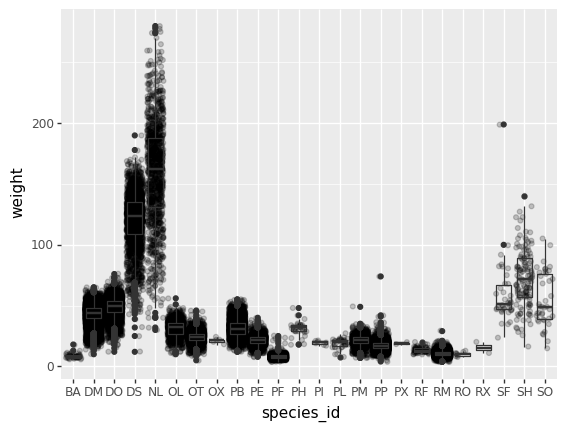

<ggplot: (-9223371961342858332)>

In [42]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot(alpha=0.)
)


> ## Challenge - distributions
>
> Boxplots are useful summaries, but hide the *shape* of the distribution.
> For example, if there is a bimodal distribution, this would not be observed
> with a boxplot. An alternative to the boxplot is the violin plot (sometimes
> known as a beanplot), where the shape (of the density of points) is drawn.
>
> In many types of data, it is important to consider the *scale* of the
> observations.  For example, it may be worth changing the scale of the axis
> to better distribute the observations in the space of the plot.
>
> - Replace the box plot with a violin plot, see `geom_violin()`
> - Represent weight on the log10 scale, see `scale_y_log10()`
> - Add color to the datapoints on your boxplot according to the plot from which
>   the sample was taken (`plot_id`)
>
> Hint: Check the class for `plot_id`. By using `factor()` within the `aes`
> mapping of a variable, `plotnine` will handle the values as category values.
>

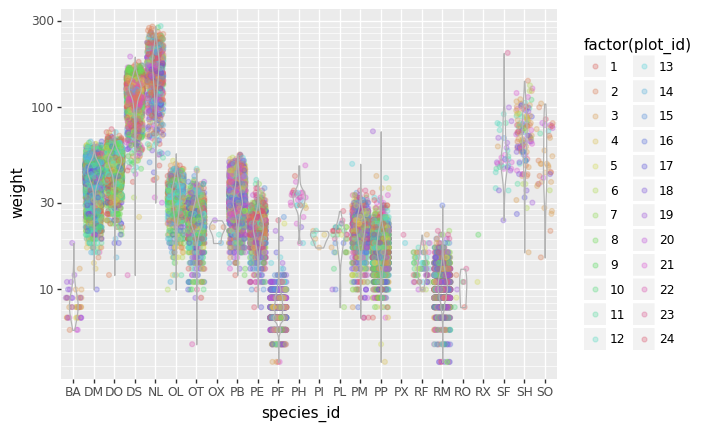

<ggplot: (-9223371961342683180)>

In [43]:
#A challenge answer

(p9.ggplot(data=surveys_complete,
            mapping=p9.aes(x='species_id',
                           y='weight',
                           color='factor(plot_id)'))
     + p9.geom_jitter(alpha=0.3)
     + p9.geom_violin(alpha=0, color="0.7")
     + p9.scale_y_log10()
 )
 



## Plotting time series data

Let's calculate number of counts per year for each species. To do that we need
to group data first and count the species (`species_id`) within each group.


In [45]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

When checking the result of the previous calculation, we actually have both the
`year` and the `species_id` as a row index. We can reset this index to use both
as column variable:


In [46]:
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


Timelapse data can be visualised as a line plot (`geom_line`) with years on `x`
axis and counts on the `y` axis.

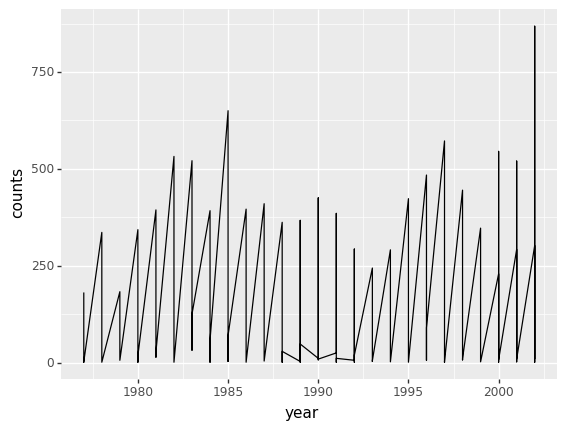

<ggplot: (-9223371961342569336)>

In [48]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts'))
    + p9.geom_line()
)

Unfortunately this does not work, because we plot data for all the species
together. We need to tell `plotnine` to draw a line for each species by
modifying the aesthetic function and map the species_id to the color:

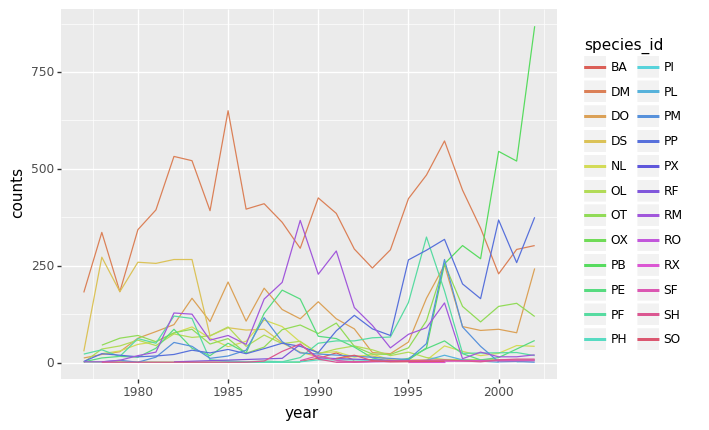

<ggplot: (-9223371961342570800)>

In [49]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line()
)

## Faceting

As any other library supporting the Grammar of Graphics, `plotnine` has a
special technique called *faceting* that allows to split one plot into multiple
plots based on a factor variable included in the dataset.

Consider our scatter plot of the `weight` versus the `hindfoot_length` from the
previous sections:


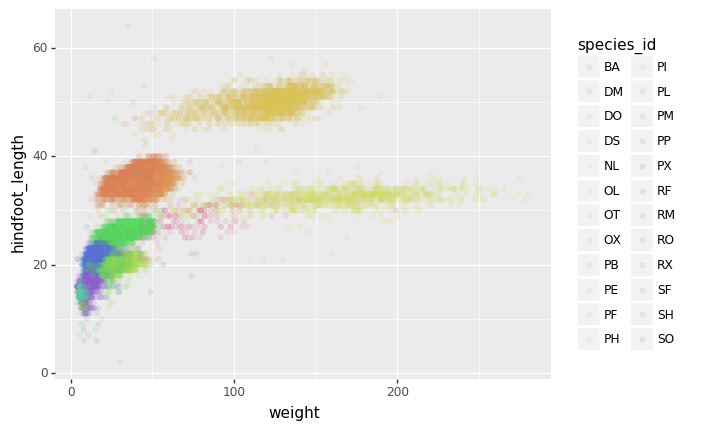

<ggplot: (-9223371961342444396)>

In [51]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

We can now keep the same code and at the `facet_wrap` on a chosen variable to
split out the graph and make a separate graph for each of the groups in that
variable. As an example, use `sex`:


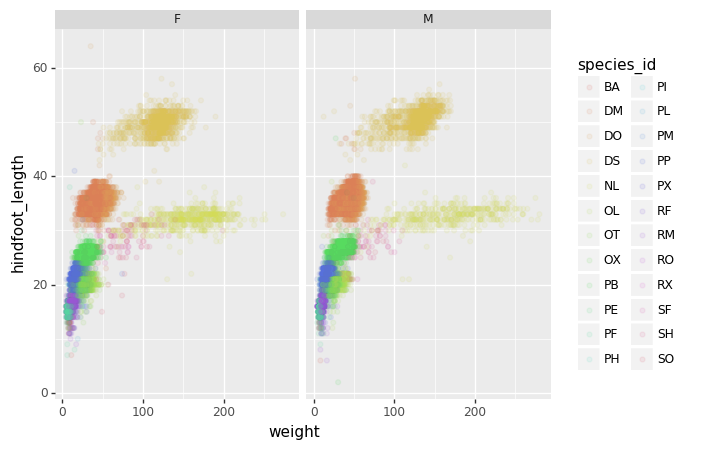

<ggplot: (-9223371961336239016)>

In [52]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("sex")
)

We can apply the same concept on any of the available categorical variables:

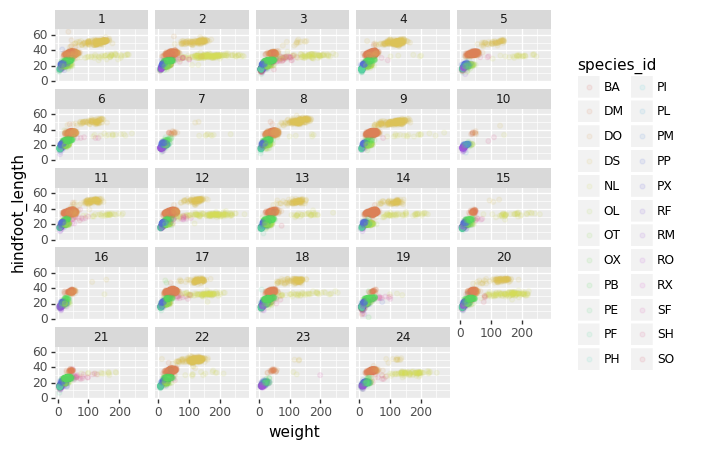

<ggplot: (-9223371961336139660)>

In [53]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("plot_id")
)


The `facet_wrap` geometry extracts plots into an arbitrary number of dimensions
to allow them to cleanly fit on one page. On the other hand, the `facet_grid`
geometry allows you to explicitly specify how you want your plots to be
arranged via formula notation (`rows ~ columns`; a `.` can be used as a
placeholder that indicates only one row or column).

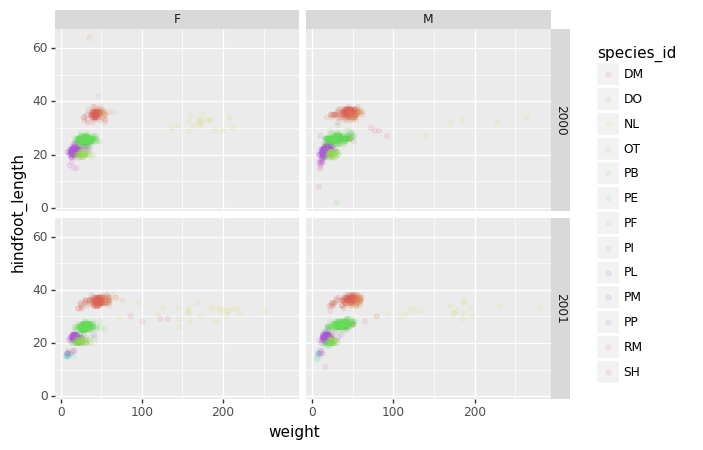

<ggplot: (-9223371961341328456)>

In [54]:
# only select the years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001])]

(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid("year ~ sex")
)

> ## Challenge - facetting
> Create a separate plot for each of the species that depicts how the average
> weight of the species changes through the years.
>

C:\Users\yorksea\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  "group aesthetic?", PlotnineWarning)


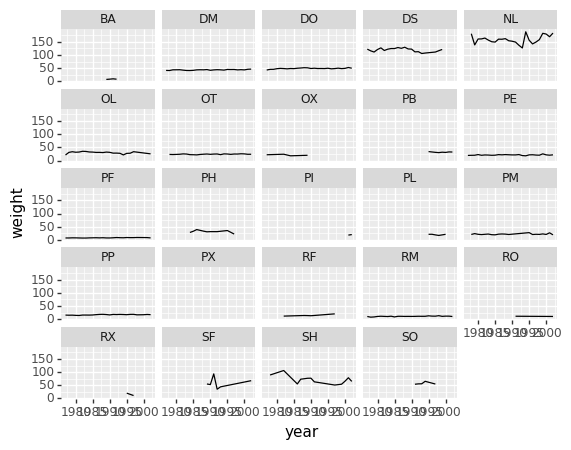

<ggplot: (-9223371961344157000)>

In [70]:
# A challenge answer
yearly_weight = surveys_complete.groupby(['year', 'species_id'])['weight'].mean().reset_index()
(p9.ggplot(data=yearly_weight, mapping=p9.aes(x='year', y='weight'))
    + p9.geom_line()
     + p9.facet_wrap("species_id")
)
#may give a plot9 aesthetic warning


> ## Challenge - facetting
> Based on the previous exercise, visually compare how the weights of male and
> females has changed through time by creating a separate plot for each sex and
> an individual color assigned to each `species_id`.

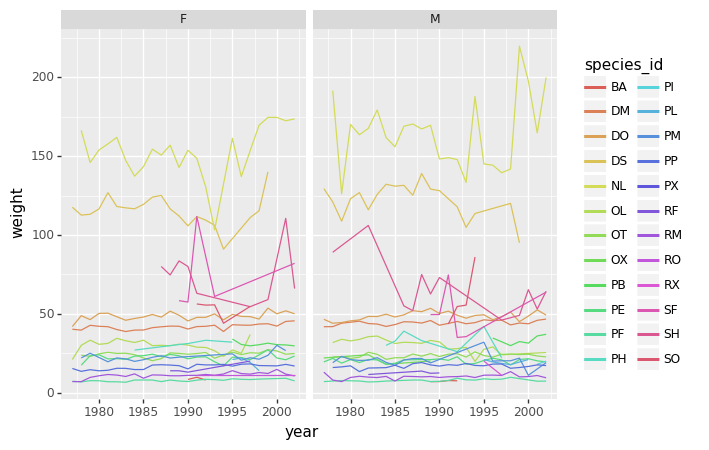

<ggplot: (-9223371961338548248)>

In [59]:
# A challenge answer

yearly_weight = surveys_complete.groupby(['year', 'species_id', 'sex'])['weight'].mean().reset_index()

(p9.ggplot(data=yearly_weight,
            mapping=p9.aes(x='year',
                           y='weight',
                           color='species_id'))
     + p9.geom_line()
     + p9.facet_wrap("sex")
)


## Further customization

As the syntax of `plotnine` follows the original R package `ggplot2`, the
documentation of `ggplot2` can provide information and inspiration to customize
graphs. Take a look at the `ggplot2` [cheat sheet][ggplot2-cheat-sheet], and think of ways to
improve the plot. You can write down some of your ideas as comments in the Etherpad.

The theming options provide a rich set of visual adaptations. Consider the
following example of a bar plot with the counts per year.


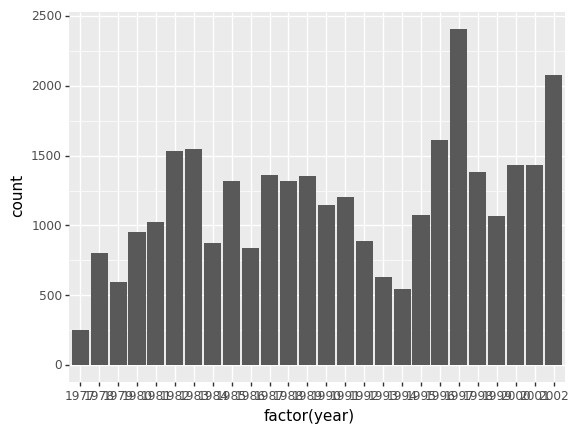

<ggplot: (-9223371961342709384)>

In [61]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
)



Notice that we use the `year` here as a categorical variable by using the
`factor` functionality. However, by doing so, we have the individual year
labels overlapping with each other. The `theme` functionality provides a way to
rotate the text of the x-axis labels:

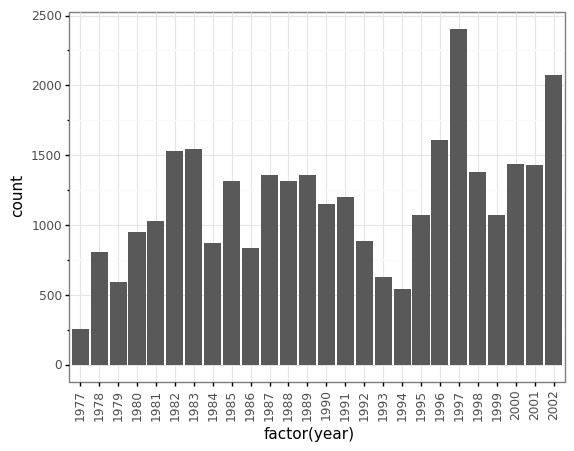

<ggplot: (-9223371961342431356)>

In [62]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

When you like a specific set of theme-customizations you created, you can save
them as an object to easily apply them to other plots you may create:

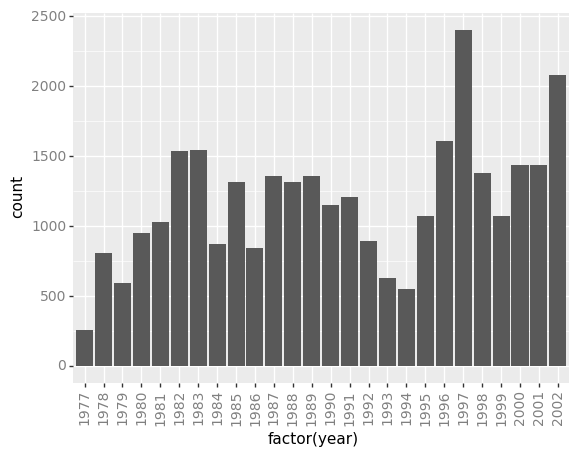

<ggplot: (-9223371961341014164)>

In [63]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = p9.element_text(color="grey", size=10))
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + my_custom_theme
)


> ## Challenge - customization
> Please take another five minutes to either improve one of the plots
> generated in this exercise or create a beautiful graph of your own.
>
> Here are some ideas:
>
> * See if you can change thickness of lines for the line plot .
> * Can you find a way to change the name of the legend? What about its labels?
> * Use a different color palette (see <http://www.cookbook-r.com/Graphs/Colors_(ggplot2)>)

After creating your plot, you can save it to a file in your favourite format.
You can easily change the dimension (and its resolution) of your plot by
adjusting the appropriate arguments (`width`, `height` and `dpi`):

In [68]:
my_plot = (p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)
my_plot.save("scatterplot.png", width=10, height=10, dpi=300)

#You may get plotnine wanrings but the scatterplot.png should still save to your notebook location

C:\Users\yorksea\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\yorksea\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: scatterplot.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


[ggplot2-cheat-sheet]: https://www.rstudio.com/wp-content/uploads/2015/08/ggplot2-cheatsheet.pdf
[ggplot2]: https://ggplot2.tidyverse.org
[grammar-of-graphics]: http://link.springer.com/book/10.1007%2F0-387-28695-0
[plotnine-api]: https://plotnine.readthedocs.io/en/stable/api.html#color-and-fill-scales
[plotnine]: https://plotnine.readthedocs.io/en/stable
[setup-plotnine]: https://datacarpentry.org/python-ecology-lesson/setup.html#download-plotting-package
